# **Algorhythm**

## **Feature Engineering**

This notebook is dedicated to performing feature engineering on the **_Algorhythm_** dataset to prepare it for effective model training. The goal is to clean, transform, and enhance the dataset by creating meaningful features and ensuring all variables are in a suitable format for predictive modeling.

### **Feature Engineering Process**

- **Data Cleaning:** Address missing values, inconsistencies, and potential outliers.
- **Feature Selection:** Identify and remove redundant or non-informative attributes.
- **Feature Transformation:** Apply necessary transformations to numerical and categorical variables.
- **Feature Creation:** Generate new features based on domain knowledge and exploratory insights.
- **Feature Scaling and Encoding:** Normalize or standardize numerical features and encode categorical variables for machine learning compatibility.

The entire process will be implemented using **scikit-learn pipelines** to maintain reproducibility and ease of experimentation.

`Simón Correa Marín`  
`Luis Felipe Ospina Giraldo`


### **1. Import Libraries and Configurations**


In [22]:
# base libraries for data science

from pathlib import Path
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

### **2. Load Data**


In [23]:
DATA_DIR = Path("../../data/02_intermediate")

# Load the Algorhythm dataset (parquet)
algorhythm_df = pd.read_parquet(DATA_DIR / "algorhythm_fixed.parquet")

In [24]:
# print library version for reproducibility

print("Pandas version: ", pd.__version__)
print("sklearn version: ", sk.__version__)

Pandas version:  2.2.3
sklearn version:  1.6.1


### **3. Data Preparation**


In [25]:
algorhythm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 2332 non-null   float64 
 1   album_name          2332 non-null   category
 2   album_popularity    2332 non-null   float64 
 3   artist_genres       1118 non-null   category
 4   artist_name         2332 non-null   category
 5   artist_popularity   2332 non-null   float64 
 6   chart_chart_name    473 non-null    category
 7   chart_genres        387 non-null    category
 8   chart_track_name    473 non-null    category
 9   chart_popularity    473 non-null    float64 
 10  chart_position      473 non-null    float64 
 11  gender              2332 non-null   category
 12  is_liked            2805 non-null   bool    
 13  is_recent_play      2805 non-null   bool    
 14  is_top_track        2805 non-null   bool    
 15  location            2332 non-null   ca

In [26]:
ordinal_categorical_cols = [
    "chart_position"
]

# Nominal categorical columns
nominal_categorical_cols = [
    "album_name",
    "artist_genres",
    "artist_name",
    "gender",
    "location",
    "music_profile",
    "track_name",
    "chart_chart_name",
    "chart_genres",
    "chart_track_name"
]

# Ordinal and Nominal Categorical columns
categorical_cols = ordinal_categorical_cols + nominal_categorical_cols
algorhythm_df[categorical_cols] = algorhythm_df[categorical_cols].astype("category")


I won't be deleting any columns for now.


#### **Missing Values**


In [27]:
algorhythm_df.isna().sum()

age                    473
album_name             473
album_popularity       473
artist_genres         1687
artist_name            473
artist_popularity      473
chart_chart_name      2332
chart_genres          2418
chart_track_name      2332
chart_popularity      2332
chart_position        2332
gender                 473
is_liked                 0
is_recent_play           0
is_top_track             0
location               473
music_profile          473
track_name             473
track_popularity       473
album_age_days         504
chart_age_days        2332
track_age_days         504
played_day_of_week     473
played_hour            473
is_recommended           0
dtype: int64

#### **Duplicated Data**


In [28]:
duplicate_rows = algorhythm_df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  289


In [29]:
algorhythm_df = algorhythm_df.drop_duplicates()
algorhythm_df.shape

(2516, 25)

In [30]:
# Missing values after dropping duplicates
algorhythm_df.isna().sum()

age                    473
album_name             473
album_popularity       473
artist_genres         1496
artist_name            473
artist_popularity      473
chart_chart_name      2043
chart_genres          2129
chart_track_name      2043
chart_popularity      2043
chart_position        2043
gender                 473
is_liked                 0
is_recent_play           0
is_top_track             0
location               473
music_profile          473
track_name             473
track_popularity       473
album_age_days         492
chart_age_days        2043
track_age_days         492
played_day_of_week     473
played_hour            473
is_recommended           0
dtype: int64

### **3. Feature Engineering**


In [31]:
# Encode target variable
algorhythm_df["is_recommended"] = algorhythm_df["is_recommended"].astype("int64")
# True = 1, False = 0

In [32]:
algorhythm_df.sample(5)

,age,album_name,album_popularity,artist_genres,artist_name,artist_popularity,chart_chart_name,chart_genres,chart_track_name,chart_popularity,...,location,music_profile,track_name,track_popularity,album_age_days,chart_age_days,track_age_days,played_day_of_week,played_hour,is_recommended
1669,21.0,"Come Over When You're Sober, Pt. 2",0.0,"emo rap, cloud rap",Lil Peep,84.0,NaN,NaN,NaN,NaN,...,Colombia,"reggaeton, country, urbano latino, latin pop, ...",Falling Down - Bonus Track,86.0,2397.0,NaN,2397.0,2.0,7.0,1
2728,NaN,NaN,NaN,NaN,NaN,NaN,Top 50 Colombia,"mexican hip hop, latin hip hop",Hasta Aquí Llegué,76.0,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,0
1103,21.0,Red (Taylor's Version),0.0,NaN,Taylor Swift,98.0,NaN,NaN,NaN,NaN,...,Colombia,"reggaeton, country, urbano latino, latin pop, ...",The Moment I Knew (Taylor's Version),64.0,1298.0,NaN,1298.0,2.0,7.0,1
1406,21.0,Mírame,0.0,reggaeton,Nio Garcia,70.0,NaN,NaN,NaN,NaN,...,Colombia,"reggaeton, country, urbano latino, latin pop, ...",Mírame - Remix,69.0,2145.0,NaN,2145.0,2.0,7.0,1
2692,NaN,NaN,NaN,NaN,NaN,NaN,Top 50 Global,"reggaeton, latin, urbano latino",LEYENDAS,62.0,...,NaN,NaN,NaN,NaN,NaN,1445.0,NaN,NaN,NaN,0


### Handling High-Cardinality or Non-Predictive Descriptive Columns

Certain columns such as `album_name`, `artist_name`, `gender`, `location`, `music_profile`, `track_name`, `chart_chart_name`, and `chart_track_name` are excluded from the model's feature set during training. These columns:

- Contain many unique categories or low variability.
- Add noise and risk overfitting if used as model inputs.
- Carry valuable descriptive information for displaying recommendations.

To balance predictive performance and rich output:

- We **train the model without these descriptive columns**.
- After predictions, we **merge these columns back** to the results.
- This way, we preserve their value for recommendation display without compromising model accuracy.


#### **Removing Outliers**


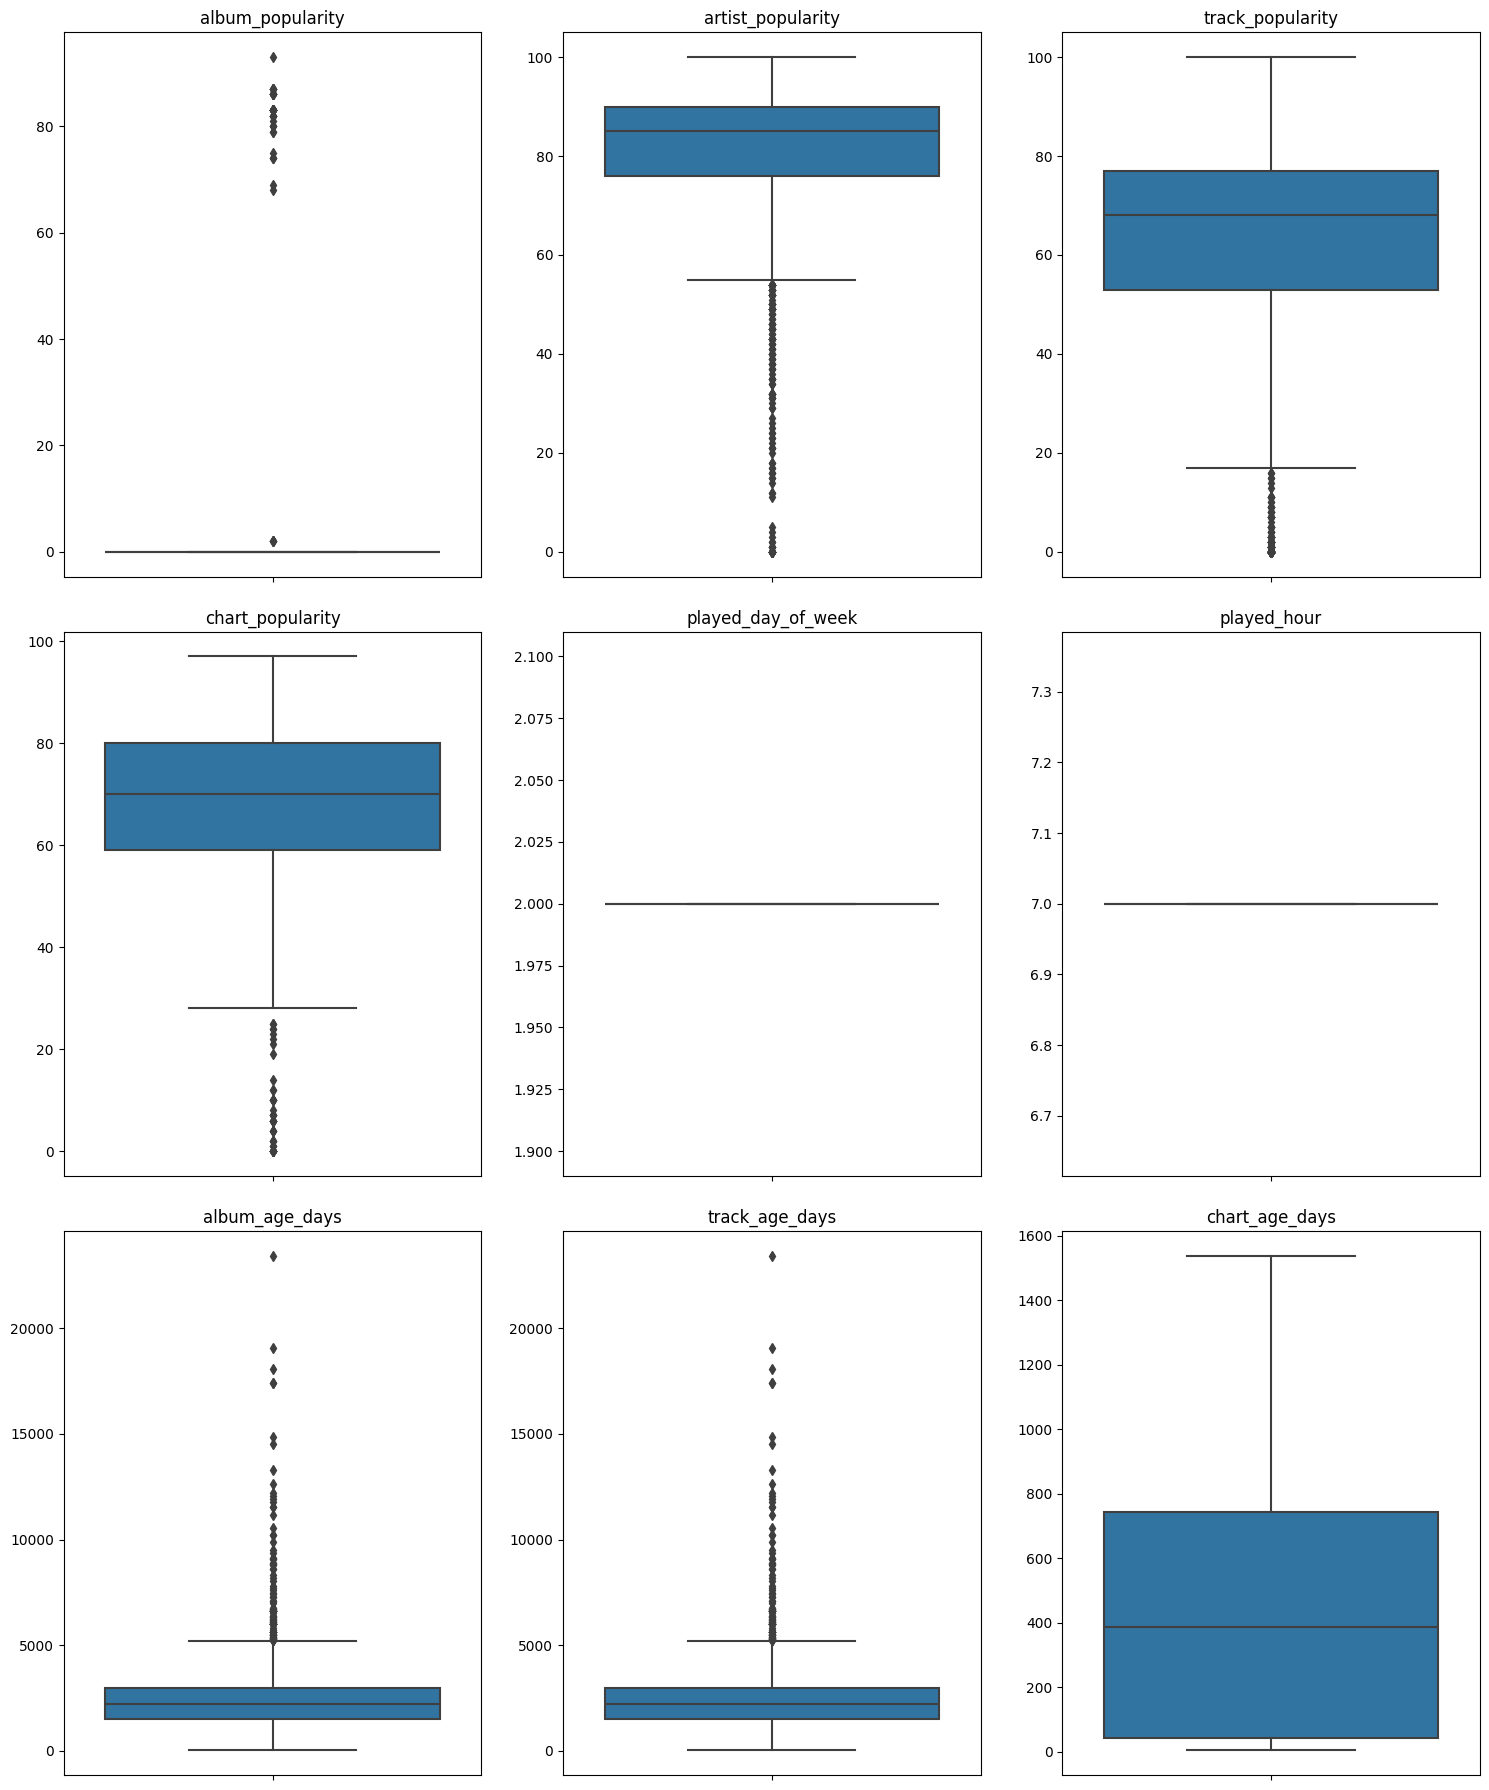

In [33]:
variables = [
    "album_popularity", "artist_popularity", "track_popularity",
    "chart_popularity", "played_day_of_week", "played_hour",
    "album_age_days", "track_age_days", "chart_age_days"
]

# Use 3 columns and 3 rows for better spacing (instead of 1 row and 9 cols)
n_cols = 3
n_rows = (len(variables) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(5 * n_cols, 6 * n_rows))  # Bigger figure for more space

for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=algorhythm_df[var])
    plt.title(var, fontsize=12)
    plt.ylabel("")  # remove y label for cleaner look

plt.tight_layout(w_pad=2, h_pad=2)  # Add padding between plots horizontally and vertically
plt.show()

### Columns Removal Justification

The following columns will be removed from the dataset because they contain mostly a single unique value or very little variability. This is because the data was collected from just one user, so these columns have the same value throughout the entire dataset and therefore do not provide meaningful information for the recommendation model:

- **played_day_of_week**
- **played_hour**
- **gender**
- **location**
- **music_profile**

Removing these columns helps simplify the dataset, reduce noise, and improve the efficiency and effectiveness of the modeling process.


In [34]:
# columns_to_drop = ["played_day_of_week", "played_hour", "gender", "location", "music_profile"]

# # Drop columns that are not needed for modeling
# algorhythm_df = algorhythm_df.drop(columns=columns_to_drop)

In [35]:
algorhythm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2804
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 2043 non-null   float64 
 1   album_name          2043 non-null   category
 2   album_popularity    2043 non-null   float64 
 3   artist_genres       1020 non-null   category
 4   artist_name         2043 non-null   category
 5   artist_popularity   2043 non-null   float64 
 6   chart_chart_name    473 non-null    category
 7   chart_genres        387 non-null    category
 8   chart_track_name    473 non-null    category
 9   chart_popularity    473 non-null    float64 
 10  chart_position      473 non-null    category
 11  gender              2043 non-null   category
 12  is_liked            2516 non-null   bool    
 13  is_recent_play      2516 non-null   bool    
 14  is_top_track        2516 non-null   bool    
 15  location            2043 non-null   categor

#### **Pipeline**


### Handling Descriptive Columns for Model Training and Results Presentation

- The original dataset contains descriptive columns (e.g., album name, artist name, user profile info) that provide rich context for recommendations but are not useful or may harm model training.

- These columns are **excluded from the training dataset** to improve model performance and reduce noise.

- After the model is trained and makes predictions, the descriptive columns are **joined back** to the predicted results using the DataFrame index to provide meaningful context for recommendation output.

This strategy ensures the model focuses on predictive features while preserving valuable information for user-facing results.


In [36]:
# Ordinal categorical columns (keep only those not descriptive)
ordinal_categorical_cols = [
    "chart_position"
]

# Nominal categorical columns (excluded descriptive ones)
nominal_categorical_cols = [
    "artist_genres",
    "chart_genres"
]

# Boolean columns (target included)
boolean_cols = [
    "is_liked",
    "is_recent_play",
    "is_top_track",
    #"is_recommended"  # Target variable
]

# Discrete numerical columns (kept all as no descriptive excluded)
disc_numerical_cols = [
    "age",
    "album_popularity",
    "artist_popularity",
    "track_popularity",
    "chart_popularity",
    "played_day_of_week",
    "played_hour"
]

# Continuous numerical columns (kept all as no descriptive excluded)
cont_numerical_cols = [
    "album_age_days",
    "track_age_days",
    "chart_age_days"
]

In [37]:
# List of descriptive columns to exclude during model training
descriptive_cols = [
    "album_name",
    "artist_name",
    "gender",
    "location",
    "music_profile",
    "track_name",
    "chart_chart_name",
    "chart_track_name"
]

# Create a new DataFrame for training that excludes these columns
algorhythm_train_df = algorhythm_df.drop(columns=descriptive_cols)

# Check the columns left for training
print("Columns used for training:")
print(algorhythm_train_df.columns)

Columns used for training:
Index(['age', 'album_popularity', 'artist_genres', 'artist_popularity',
       'chart_genres', 'chart_popularity', 'chart_position', 'is_liked',
       'is_recent_play', 'is_top_track', 'track_popularity', 'album_age_days',
       'chart_age_days', 'track_age_days', 'played_day_of_week', 'played_hour',
       'is_recommended'],
      dtype='object')


In [ ]:
def simplify_and_clean_genres(genre_str):
    """
    Simplifies genre string by taking the first genre separated by commas,
    then cleans the genre string by lowercasing, replacing spaces/commas with underscores,
    removing special characters, and removing repeated underscores.
    """
    if not isinstance(genre_str, str):
        return genre_str  # handle NaN or None gracefully
    
    # Step 1: Simplify - take the first genre only
    first_genre = genre_str.split(',')[0].strip().lower()
    
    # Step 2: Clean - normalize string
    cleaned = first_genre
    cleaned = re.sub(r'[ ,]+', '_', cleaned)           # Replace spaces and commas with underscore
    cleaned = re.sub(r'[^a-z0-9_]', '', cleaned)       # Remove non-alphanumeric and non-underscore chars
    cleaned = re.sub(r'_+', '_', cleaned)               # Replace multiple underscores with one
    
    return cleaned

# Apply to relevant columns
for col in ['artist_genres', 'chart_genres']:
    if col in algorhythm_train_df.columns:
        algorhythm_train_df[col] = algorhythm_train_df[col].apply(simplify_and_clean_genres)

In [43]:
# # Suppose you have prediction results in this DataFrame (or Series)
# predictions = algorhythm_train_df.copy()
# predictions['predicted_recommendation'] = model.predict(X_train)  # Example

# # Join descriptive columns from original df by index
# final_results = predictions.join(algorhythm_df[descriptive_cols])

# # Now final_results has predictions plus all descriptive info for display/export
# print(final_results.head())

### Handling Missing Values in Chart Features

The **chart-related features** in the dataset (such as `chart_chart_name`, `chart_genres`, `chart_track_name`, `chart_position`, `chart_popularity`, and `chart_age_days`) contain many missing (`NaN`) values. These missing values are **meaningful** because they indicate that the corresponding tracks **do not belong to any chart in the user's history**.

Filling these NaNs with arbitrary values like means or zeros would distort this information and confuse the model. Instead, we handle these missing values as follows:

- For **categorical chart features**, we replace missing values with a special category label such as `"No_Chart"` to explicitly indicate the absence of a chart affiliation.

- For **numerical chart features**, we impute missing values with a distinct constant (e.g., `-1`) that is outside the normal range of values. Additionally, we add a **missing indicator flag** to signal to the model when the original data was missing.

This approach preserves the important information conveyed by the missingness itself, enabling the model to learn that "no chart" is a valid and relevant category. It improves the model’s ability to distinguish between tracks that belong to charts and those that do not, without losing any information.

In summary, the missing values in chart features are **not random missing data** but rather a useful signal, so we handle them carefully in the preprocessing pipeline to maintain their meaning.


In [44]:
class NumericWithIndicator(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value=-1):
        self.fill_value = fill_value
        self.imputer = SimpleImputer(strategy="constant", fill_value=fill_value)
        self.indicator = MissingIndicator(features='missing-only')
    
    def fit(self, X, y=None):
        self.imputer.fit(X)
        self.indicator.fit(X)
        return self
    
    def transform(self, X):
        X_imputed = self.imputer.transform(X)
        X_ind = self.indicator.transform(X)
        return np.hstack((X_imputed, X_ind))

    def get_feature_names_out(self, input_features=None):
        # input_features: list of original column names passed to this transformer
        if input_features is None:
            input_features = []

        n_features_in = len(input_features)
        # Imputed features names stay the same
        imputed_features = list(input_features)

        # Missing indicator features get suffix "_missing_indicator"
        indicator_features = [f"{feat}_missing_indicator" for feat in input_features]

        return imputed_features + indicator_features

# Define columns explicitly for chart features
chart_categorical_cols = ["chart_genres"]
chart_numerical_cols = ["chart_popularity", "chart_age_days", "chart_position"]


In [45]:
# Updated categorical chart pipeline
chart_nom_categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="No_Chart")),
        ("onehot", OneHotEncoder(drop="if_binary", handle_unknown="ignore")),
    ]
)

# Updated numerical chart pipeline with missing indicator
chart_num_pipe = Pipeline(
    steps=[
        ("imputer_with_ind", NumericWithIndicator(fill_value=-1)),
    ]
)

In [46]:
# Other pipelines (non-chart features)

numeric_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
    ]
)

nom_categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop="if_binary", handle_unknown="ignore")),
    ]
)

ord_categorical_ord_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OrdinalEncoder()),
    ]
)

boolean_pipe = Pipeline(
    steps=[
        ("to_int", FunctionTransformer(lambda x: x.astype("int64"), feature_names_out="one-to-one")),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop="if_binary")),
    ]
)

In [47]:
# Combine all pipelines in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipe, disc_numerical_cols + cont_numerical_cols),
        ("nominal_categoric", nom_categorical_pipe, nominal_categorical_cols),
        ("ordinal_categoric", ord_categorical_ord_pipe, ordinal_categorical_cols),
        ("boolean", boolean_pipe, boolean_cols),
        ("chart_nominal", chart_nom_categorical_pipe, chart_categorical_cols),
        ("chart_numeric", chart_num_pipe, chart_numerical_cols),
    ]
)

In [48]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age', 'album_popularity',
                                  'artist_popularity', 'track_popularity',
                                  'chart_popularity', 'played_day_of_week',
                                  'played_hour', 'album_age_days',
                                  'track_age_days', 'chart_age_days']),
                                ('nominal_categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='...
                                 ['is_liked', 'is_recent_play',
                                  'is_top_track']),
                                ('chart_nominal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='No_Chart',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['chart_genres']),
                                ('chart_numeric',
                                 Pipeline(steps=[('imputer_with_ind',
                                                  NumericWithIndicator())]),
                                 ['chart_popularity', 'chart_age_days',
                                  'chart_position'])])

### Preprocessing Pipeline

This preprocessing pipeline is designed to prepare the **Algorhythm** dataset by appropriately handling various types of features—numeric, nominal categorical, ordinal categorical, boolean, and chart-related—using dedicated transformation pipelines.

#### 1️. Numeric Pipeline

- **Columns:** Combination of discrete and continuous numerical features, including `age`, `album_popularity`, `artist_popularity`, `track_popularity`, `chart_popularity`, `played_day_of_week`, `played_hour`, `album_age_days`, `track_age_days`, and `chart_age_days`.
- **Steps:**
  - `SimpleImputer(strategy="median")`: Imputes missing numeric values with the median of each column.

#### 2️. Nominal Categorical Pipeline

- **Columns:** Nominal categorical features such as `artist_genres` and `chart_genres`.
- **Steps:**
  - `SimpleImputer(strategy="most_frequent")`: Imputes missing values using the most frequent category.
  - `OneHotEncoder(drop="if_binary", handle_unknown="ignore")`: Applies one-hot encoding, dropping one category if binary and ignoring unknown categories during transformation.

#### 3️. Ordinal Categorical Pipeline

- **Columns:** Ordinal categorical features such as `chart_position`.
- **Steps:**
  - `SimpleImputer(strategy="most_frequent")`: Imputes missing values with the most frequent category.
  - `OrdinalEncoder()`: Encodes ordinal features into integer values preserving their order.

#### 4️. Boolean Pipeline

- **Columns:** Boolean features including `is_liked`, `is_recent_play`, and `is_top_track`.
- **Steps:**
  - `FunctionTransformer(lambda x: x.astype("int64"), feature_names_out="one-to-one")`: Converts boolean values into integers (`0` and `1`).
  - `SimpleImputer(strategy="most_frequent")`: Imputes missing boolean values with the most frequent value.
  - `OneHotEncoder(drop="if_binary")`: Applies one-hot encoding, dropping one category for binary variables.

#### 5️. Chart-Related Pipelines

- **Categorical Chart Pipeline:**

  - **Columns:** `chart_genres`
  - **Steps:**
    - `SimpleImputer(strategy="constant", fill_value="No_Chart")`: Replaces missing chart genres with the special category `"No_Chart"`.
    - `OneHotEncoder(drop="if_binary", handle_unknown="ignore")`: One-hot encodes chart genre categories.

- **Numerical Chart Pipeline:**
  - **Columns:** `chart_popularity`, `chart_age_days`, and `chart_position`
  - **Steps:**
    - `NumericWithIndicator(fill_value=-1)`: Custom transformer that imputes missing values with `-1` and adds missing indicator flags to preserve information about missingness.

#### 6️. Column Transformer

Combines all the above pipelines into a single transformer that applies the appropriate preprocessing steps to each feature subset:

- Numeric features → `numeric_pipe`
- Nominal categorical features → `nom_categorical_pipe`
- Ordinal categorical features → `ord_categorical_ord_pipe`
- Boolean features → `boolean_pipe`
- Chart nominal categorical features → `chart_nom_categorical_pipe`
- Chart numerical features → `chart_num_pipe`


#### **Train/Test split**


In [49]:
X_features = algorhythm_train_df.drop("is_recommended", axis="columns")
Y_target = algorhythm_train_df["is_recommended"]

# 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, stratify=Y_target
)

In [50]:
x_train.shape, y_train.shape

((2012, 16), (2012,))

In [51]:
x_test.shape, y_test.shape

((504, 16), (504,))

In [52]:
print(x_train.dtypes)

age                    float64
album_popularity       float64
artist_genres           object
artist_popularity      float64
chart_genres            object
chart_popularity       float64
chart_position        category
is_liked                  bool
is_recent_play            bool
is_top_track              bool
track_popularity       float64
album_age_days         float64
chart_age_days         float64
track_age_days         float64
played_day_of_week     float64
played_hour            float64
dtype: object


#### **Preprocessing Pipeline**


In [53]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age', 'album_popularity',
                                  'artist_popularity', 'track_popularity',
                                  'chart_popularity', 'played_day_of_week',
                                  'played_hour', 'album_age_days',
                                  'track_age_days', 'chart_age_days']),
                                ('nominal_categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='...
                                 ['is_liked', 'is_recent_play',
                                  'is_top_track']),
                                ('chart_nominal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='No_Chart',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['chart_genres']),
                                ('chart_numeric',
                                 Pipeline(steps=[('imputer_with_ind',
                                                  NumericWithIndicator())]),
                                 ['chart_popularity', 'chart_age_days',
                                  'chart_position'])])

In [54]:
def get_feature_names_from_column_transformer(column_transformer, input_features):
    """
    Extracts the feature names produced by a fitted ColumnTransformer, including names
    generated by individual transformers like OneHotEncoder, and handles cases where
    transformers may or may not implement get_feature_names_out.

    Parameters:
    - column_transformer: A fitted sklearn ColumnTransformer object.
    - input_features: List or Index of original input feature names (e.g. x_train.columns).

    Returns:
    - feature_names: List of all transformed feature names in order.
    """
    feature_names = []

    # Iterate over all transformers inside the ColumnTransformer
    for name, transformer, columns in column_transformer.transformers_:
        # Skip any 'remainder' transformers (like passthrough or drop)
        if name == 'remainder':
            continue

        # Normalize columns variable to a list of column names
        # It can be a slice, list, numpy array, or a single string
        if isinstance(columns, slice):
            # If slice, use it to slice the input_features list/index
            cols = list(input_features[columns])
        elif isinstance(columns, (list, np.ndarray)):
            # If list or array, just convert to list
            cols = list(columns)
        else:
            # Otherwise assume a single column name string
            cols = [columns]

        # Check if the transformer has a method to get output feature names
        if hasattr(transformer, 'get_feature_names_out'):
            try:
                # Try to get transformed feature names using input columns as context
                names = transformer.get_feature_names_out(cols)
            except Exception:
                # If an error happens (e.g. custom transformers), fallback:
                if hasattr(transformer, 'get_feature_names_out'):
                    # Retry if possible
                    names = transformer.get_feature_names_out(cols)
                else:
                    # Otherwise, just use original column names (no expansion)
                    names = cols
            feature_names.extend(names)
        else:
            # If no get_feature_names_out method, just use original column names
            feature_names.extend(cols)

    return feature_names

feature_names = get_feature_names_from_column_transformer(preprocessor, x_train.columns)
print(f"Number of features: {len(feature_names)}")
print(feature_names)

Number of features: 166
['age', 'album_popularity', 'artist_popularity', 'track_popularity', 'chart_popularity', 'played_day_of_week', 'played_hour', 'album_age_days', 'track_age_days', 'chart_age_days', 'artist_genres_ambient_folk', 'artist_genres_anime', 'artist_genres_argentine_rock', 'artist_genres_argentine_trap', 'artist_genres_art_pop', 'artist_genres_art_rock', 'artist_genres_bachata', 'artist_genres_baroque_pop', 'artist_genres_bedroom_pop', 'artist_genres_bolero', 'artist_genres_brazilian_bass', 'artist_genres_brazilian_funk', 'artist_genres_brazilian_pop', 'artist_genres_brooklyn_drill', 'artist_genres_chanson', 'artist_genres_chilean_trap', 'artist_genres_christmas', 'artist_genres_classic_rock', 'artist_genres_cloud_rap', 'artist_genres_cold_wave', 'artist_genres_colombian_pop', 'artist_genres_corrido', 'artist_genres_corridos_tumbados', 'artist_genres_dancehall', 'artist_genres_dark_rb', 'artist_genres_darkwave', 'artist_genres_dembow', 'artist_genres_dream_pop', 'artist_

In [55]:
# Then get feature names from fitted preprocessor
feature_names = get_feature_names_from_column_transformer(preprocessor, x_train.columns)

print(f"Number of features: {len(feature_names)}")

# Transform data
x_train_transformed = preprocessor.transform(x_train)

# Convert to dense
x_train_dense = x_train_transformed.toarray()

# Create DataFrame with feature names
x_train_transformed_df = pd.DataFrame(x_train_dense, columns=feature_names)

print(x_train_transformed_df.shape)
x_train_transformed_df.head()

Number of features: 166
(2012, 166)


/Users/simon/Documents/music-recommendation-system/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


,age,album_popularity,artist_popularity,track_popularity,chart_popularity,played_day_of_week,played_hour,album_age_days,track_age_days,chart_age_days,...,chart_genres_texas_country,chart_genres_trap_latino,chart_genres_urbano_latino,chart_genres_vallenato,chart_popularity,chart_age_days,chart_position,chart_popularity_missing_indicator,chart_age_days_missing_indicator,chart_position_missing_indicator
0,21.0,0.0,87.0,72.0,70.0,2.0,7.0,346.0,346.0,388.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
1,21.0,0.0,85.0,68.0,75.0,2.0,7.0,2243.0,2243.0,1130.0,...,0.0,0.0,0.0,0.0,75.0,1130.0,188.0,0.0,0.0,0.0
2,21.0,0.0,96.0,95.0,70.0,2.0,7.0,122.0,122.0,388.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,21.0,0.0,49.0,67.0,70.0,2.0,7.0,1968.0,1968.0,388.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4,21.0,0.0,85.0,68.0,49.0,2.0,7.0,2243.0,2243.0,8.0,...,0.0,0.0,0.0,0.0,49.0,8.0,9.0,0.0,0.0,0.0


In [56]:
x_train.head()

,age,album_popularity,artist_genres,artist_popularity,chart_genres,chart_popularity,chart_position,is_liked,is_recent_play,is_top_track,track_popularity,album_age_days,chart_age_days,track_age_days,played_day_of_week,played_hour
310,21.0,0.0,nan,87.0,nan,NaN,NaN,False,False,True,72.0,346.0,NaN,346.0,2.0,7.0
2649,NaN,NaN,nan,NaN,reggaeton,75.0,188.0,True,True,True,NaN,NaN,1130.0,NaN,NaN,NaN
322,21.0,0.0,nan,96.0,nan,NaN,NaN,False,False,True,95.0,122.0,NaN,122.0,2.0,7.0
1549,21.0,0.0,nan,49.0,nan,NaN,NaN,True,False,False,67.0,1968.0,NaN,1968.0,2.0,7.0
2340,NaN,NaN,nan,NaN,country,49.0,9.0,True,True,True,NaN,NaN,8.0,NaN,NaN,NaN


### **4. Conclusions and results**


- We decided **not to remove outliers** due to the potential relevance of extreme values in the context of music analysis and personalized recommendations.
- Built a **modular and reproducible pipeline** that properly handles all data types: numerical, nominal categorical, ordinal, and boolean.
- Simplified and cleaned genre columns to reduce cardinality and avoid duplicates caused by varied formatting, improving feature quality.
- Carefully handled missing values in chart-related features by imputing with constants and adding missing indicator flags, preserving the implicit information of absence.
- Excluded high-cardinality descriptive columns during training to reduce noise and overfitting risk, while retaining them for user-facing result presentation.
- Ended up with a transformed dataset containing **166 useful features** for training effective predictive models and recommendation systems.
